## Hide it

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

[sudo] password for piyush: 

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
# from google.colab.patches import cv2_imshow

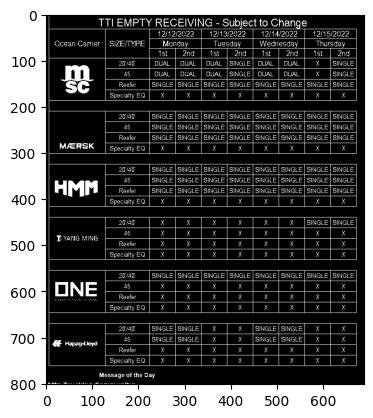

In [ ]:
file=r'./content/1.png'
img = cv2.imread(file,0)
img.shape
#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('cv_inverted.png',img_bin)
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

In [ ]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

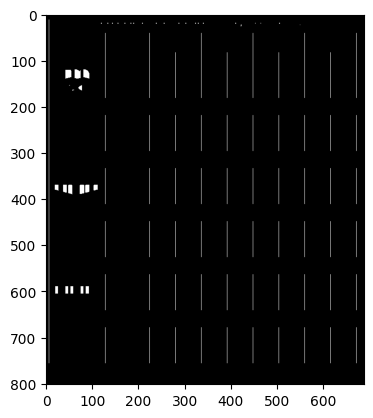

In [ ]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)

cv2.imwrite("./temp/vertical.jpg",vertical_lines)#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

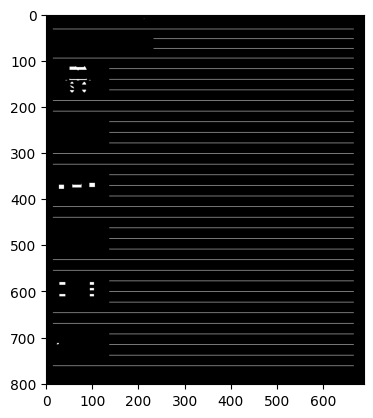

In [ ]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)

cv2.imwrite("./temp/horizontal.jpg",horizontal_lines)#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

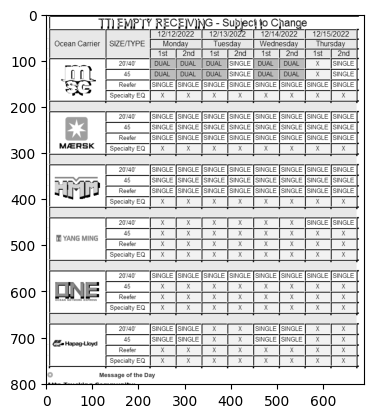

In [ ]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# cv2.imwrite("img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [ ]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
      reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
      i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

In [ ]:
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
#Get mean of heights
mean = np.mean(heights)

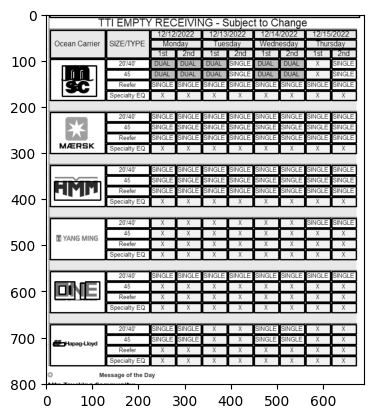

In [ ]:
#Create list box to store all boxes in  
box = []# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)    
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
        plotting = plt.imshow(image,cmap='gray')
plt.show()

In [ ]:
box

[[8, 2, 671, 5],
 [563, 35, 109, 18],
 [451, 35, 109, 18],
 [339, 35, 109, 18],
 [227, 35, 109, 18],
 [131, 35, 93, 60],
 [9, 35, 119, 60],
 [563, 56, 109, 18],
 [451, 56, 109, 18],
 [339, 56, 109, 18],
 [227, 56, 109, 18],
 [619, 77, 53, 18],
 [563, 77, 53, 18],
 [507, 77, 53, 18],
 [451, 77, 53, 18],
 [395, 77, 53, 18],
 [339, 77, 53, 18],
 [283, 77, 53, 18],
 [227, 77, 53, 18],
 [619, 98, 53, 20],
 [563, 98, 53, 20],
 [507, 98, 53, 20],
 [451, 98, 53, 20],
 [395, 98, 53, 20],
 [339, 98, 53, 20],
 [283, 98, 53, 20],
 [227, 98, 53, 20],
 [131, 98, 93, 20],
 [9, 98, 119, 89],
 [35, 112, 74, 66],
 [619, 121, 53, 20],
 [563, 121, 53, 20],
 [507, 121, 53, 20],
 [451, 121, 53, 20],
 [395, 121, 53, 20],
 [339, 121, 53, 20],
 [283, 121, 53, 20],
 [227, 121, 53, 20],
 [131, 121, 93, 20],
 [57, 123, 5, 17],
 [77, 124, 4, 17],
 [619, 144, 53, 20],
 [563, 144, 53, 20],
 [507, 144, 53, 20],
 [451, 144, 53, 20],
 [395, 144, 53, 20],
 [339, 144, 53, 20],
 [283, 144, 53, 20],
 [227, 144, 53, 20],
 [

In [ ]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0#Sorting the boxes to their respective row and column
for i in range(len(box)):    
    if(i==0):
        column.append(box[i])
        previous=box[i]    
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)        
            else:
                row.append(column)
                column=[]
                previous = box[i]
                column.append(box[i])
    print(column)
    print(row)

In [ ]:
column

[[8, 2, 671, 5]]

In [ ]:
#calculating maximum number of cellscountcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [ ]:
#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]

center=np.array(center)
center.sort()
print(center)

IndexError: list index out of range

In [ ]:
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.imshow('image',image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        box.append([x,y,w,h])
        cropped_image = img[y:y+h+1,x:x+w]
        c1,c2 = cropped_image.shape

        if not c2 <=10 and not c1<=10:
          cv2_imshow(cropped_image)
          print(c1,c2)
          out = pytesseract.image_to_data(cropped_image,config=r'-l eng --oem 3 --psm 10 --dpi 300', output_type=Output.DICT,lang="eng")
          for i,j in enumerate(out['text']): 
            if 'xX' in j or 'x' in j:
              out['text'][i] = 'X'

            if '40' in j:
              out['text'][i] = "20'/40'"

            if '_' in j or '|' in j:
              out['text'][i] = ""

            if 'st' in j:
              out['text'][i] ="1st"

          print(out['text'])

## start from here

In [4]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

#read your file
file='./content/5.png'
img = cv2.imread(file,0)

# crop image for proper output
h = img.shape[0]
w = img.shape[1]
img = img[29:30+h,120:w-5]

cv2.imshow("img",img)
# cv2.imshow('Image', image )
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
# to detect biggest box



import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

#read your file
file='./content/5.png'
img = cv2.imread(file,0)

# crop image for proper output
h1 = img.shape[0]
w1 = img.shape[1]
img = img[29:30+h1,115:w1-5]



#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin


# countcol(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)

#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)

# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# cv2.imwrite("./content/img_vh.jpg", img_vh)Meetd90168
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

#Get mean of heights
mean = np.mean(heights)

#Create list box to store all boxes in  
box = []
flag = False
countCols = 2
firstcolcheck=True
blackBox = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        # image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
        cellWidth = box[-1][2]
        cellHeight= box[-1][3]

        # plotting = plt.imshow(image,cmap='gray')
        # plt.show()
        if len(box)>2:
            px = box[-2][0]
            if firstcolcheck :
                if box[-2][2] == box[-1][2]:
                    countCols += 1
                else:
                    countCols = (3*countCols +1)

                    firstcolcheck = False
            if not firstcolcheck:
                countCols -= 1 
            # print(x,y,h,w)
            # print(countCols)
            xdiff = px - x
            if (x+box[-2][2]-5)<px<(x+box[2][2]+5):
                pass
            elif (x+w) > 10 & xdiff != 104 and xdiff>10 and x>10 and px >10 and xdiff>10:
                leftPoint = (x+w)+3
                rightPoint = px
                distanceFromTop = y
                print(f"blank dim are : {(x+w)},{px} y={y}")
                xs = (x+w)
                rxe = px
                ys = y-3
                blackBox.append((xs,rxe,ys))
            if countCols < 0 and box[-1][2]>75:
                break

blank dim are : 301,668 y=60


In [6]:
# image = cv2.imread('5.png')
h,w = img.shape

# xs = 297
# ys = 58 #fix

# rxe = 661
rye = h-2

xe = xs+52
ye = ys + 22

width = 664-4
height = 720-2
noOfRectVer = (rxe-xs)//50
noOfRectHor = (rye-ys)//21

rows = (rxe-xs)//50
columns = (rye-ys)//21


def drawrectangles(img,xs,ys,xe,ye,rxe,rye,rows,columns):
    firstRow = True
    tempys = ys
    img = cv2.rectangle(img, (xs,ys), (rxe-5,rye), (255,255,255), -1)

    for i in range(rows):
        if firstRow:
            firstRow = False
        else:
            xs = xe
            xe = xe + 52
            ys = tempys

        firstColumn = True
        for j in range(columns+1):
            if firstColumn:
                firstColumn =False
            else:
                if j == 15:
                    ys = ys + 22 - 3
                else:
                    ys = ys + 22

            img = cv2.rectangle(img, (xs,ys), (xe,ye), (0,0,0), 1)
        # break
    cv2.imshow('Rectangle',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return img


img = drawrectangles(img,xs,ys,xe,ye,rxe,rye,rows,columns)

cv2.imwrite('temp.png',img)

True

In [ ]:
# import cv2

# image = cv2.imread('5.png')
# # height, width, channels = image.shape
# xs = 297+2
# ys = 89

# start_point = (xs,ys)
# width = 664-4
# height = 720-2
# end_point = (width,height)
# color = (255,255,255)
# thickness = 100

# image = cv2.rectangle(image, start_point, end_point, color, -1)

# noOfRectVer = (width-xs)//50
# noOfRectHor = (height-ys)//21
# # image = cv2.rectangle(image,start_point,(348,107),(0,0,255),1)

# def drawrectangles(image,xs,ys,width,height):
#     flag = True
#     i = 0 
#     end_point = (width,height)
#     for v in range(noOfRectVer):
#         if flag:
#             flag =False
#             pass
#         else:
#             xs = xs + width
#         firtTime = True
#         for h in range(noOfRectHor):
#             if firtTime:
#                 start_point = (xs,ys)
#                 end_point = (width,height)
#                 print(start_point,end_point)
#                 firtTime = False
#             else:
#                 ys = ys+height
#                 start_point = (xs,ys)
#                 end_point = (width,height)
#                 print(start_point,end_point)
#             image = cv2.rectangle(image,start_point,(width,height),(0,0,255),1)
#             # i += 1
#             # if i >4:
#             #     break
            
#     return image


# image = drawrectangles(image,xs,ys,348,21)
# cv2.imshow('Rectangle',image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

#read your file
file='temp.png'
img = cv2.imread(file,0)
img.shape


(673, 687)

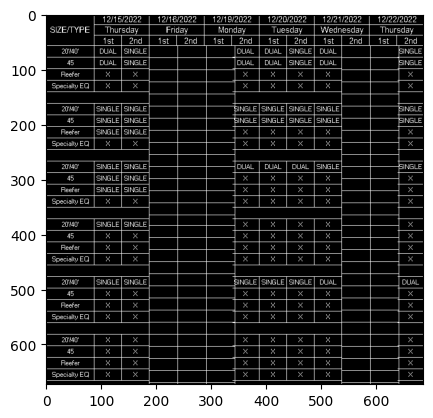

In [ ]:
#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('/content/cv_inverted.png',img_bin)
#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()


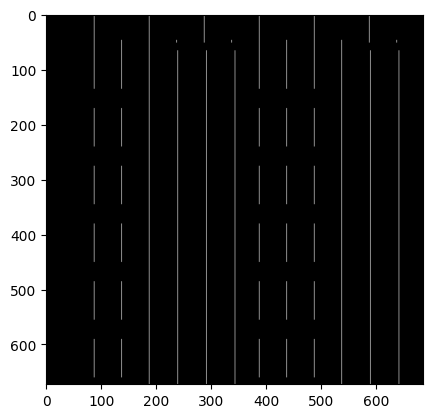

In [ ]:

# countcol(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("./content/vertical.jpg",vertical_lines)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()



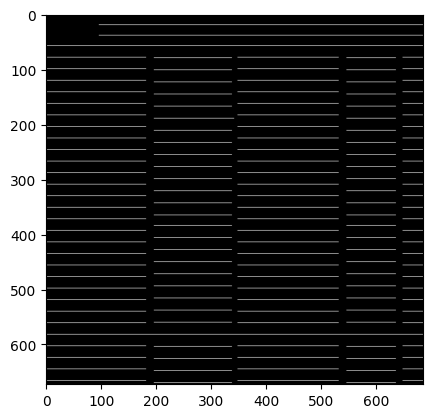

In [ ]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("./content/horizontal.jpg",horizontal_lines)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()


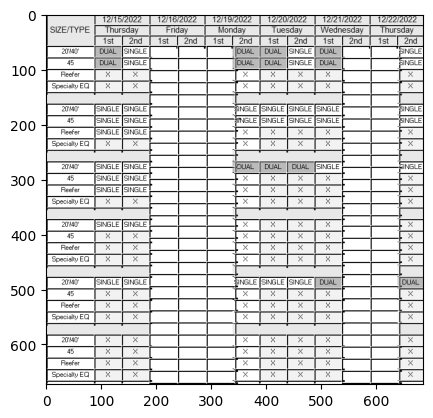

In [ ]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("./content/img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()



In [ ]:
import cv2

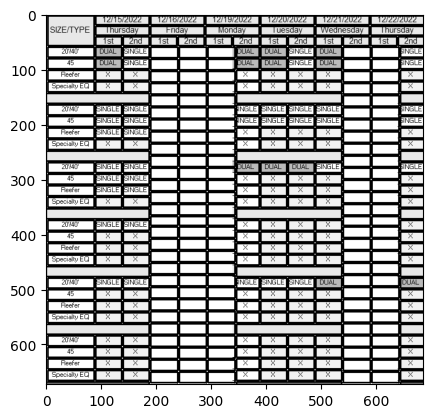

In [ ]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

#Get mean of heights
mean = np.mean(heights)

#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
        
plotting = plt.imshow(image,cmap='gray')
plt.show()

In [ ]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0

#Sorting the boxes to their respective row and column
for i in range(len(box)):    
        
    if(i==0):
        column.append(box[i])
        previous=box[i]    
    
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]            
            
            if(i==len(box)-1):
                row.append(column)        
            
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
            
print(column)
print(row)

[[644, 669, 43, 4], [346, 669, 191, 4], [0, 669, 187, 4]]
[[[590, 3, 97, 16], [490, 3, 97, 16], [390, 3, 97, 16], [290, 3, 97, 16], [190, 3, 97, 16], [90, 3, 97, 16], [3, 3, 84, 54]], [[590, 22, 97, 16], [490, 22, 97, 16], [390, 22, 97, 16], [290, 22, 97, 16], [190, 22, 97, 16], [90, 22, 97, 16]], [[640, 41, 47, 16], [590, 41, 47, 16], [540, 41, 47, 16], [490, 41, 47, 16], [440, 41, 47, 16], [390, 41, 47, 16], [340, 41, 47, 16], [290, 41, 47, 16], [240, 41, 47, 16], [190, 41, 47, 16], [140, 41, 47, 16], [90, 41, 47, 16]], [[644, 60, 43, 18], [592, 60, 49, 19], [540, 60, 49, 19], [490, 60, 47, 18], [440, 60, 47, 18], [390, 60, 47, 18], [346, 60, 41, 18], [294, 60, 49, 19], [242, 60, 49, 19], [190, 60, 49, 19], [140, 60, 47, 18], [90, 60, 47, 18], [3, 60, 84, 18]], [[644, 81, 43, 18], [490, 81, 47, 18], [440, 81, 47, 18], [390, 81, 47, 18], [346, 81, 41, 18], [140, 81, 47, 18], [90, 81, 47, 18], [3, 81, 84, 18], [592, 82, 49, 19], [540, 82, 49, 19], [294, 82, 49, 19], [242, 82, 49, 19], 

In [ ]:
#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]

center=np.array(center)
center.sort()
print(center)


[ 93 441 665]


In [ ]:
#Regarding the distance to the columns center, the boxes are arranged in respective order

finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)


#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)
                
                out = pytesseract.image_to_string(erosion, config='-l eng --oem 3 --psm 10 --dpi 300')
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='-l eng --oem 3 --psm 10 --dpi 300')
                inner = inner +" "+ out
            outer.append(inner)

In [ ]:
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row), countcol))
print(dataframe)
# data = dataframe.style.set_properties(align="left")
#Converting it in a excel-file
# data.to_excel("output.xlsx")
dataframe.to_csv("test.csv")

                                            0  \
0    12/16/2022\n 12/15/2022\n SIZE/TYPE\n   
1                       Friday\n Thursday\n   
2                 2nd\n ist\n 2nd\n ist\n   
3       s\n .\n SINGLE\n DUAL\n 20140"\n   
4          SINGLE\n DUAL\n 45\n Oo\n -\n   
5             x\n x\n Reefer\n Oo\n se\n   
6        x\n x\n Specialty EQ\n Oo\n .\n   
7                             @\n Oo\n .\n   
8    SINGLE\n SINGLE\n 20140"\n Oo\n .\n   
9        SINGLE\n SINGLE\n 45\n Oo\n .\n   
10   SINGLE\n SINGLE\n Reefer\n Oo\n .\n   
11       x\n x\n Specialty EQ\n Oo\n .\n   
12                            @\n Oo\n .\n   
13              SINGLE\n SINGLE\n 20140"\n   
14                                 Oo\n .\n   
15                  SINGLE\n SINGLE\n 45\n   
16                                 Oo\n .\n   
17              SINGLE\n SINGLE\n Reefer\n   
18       Oo\n .\n x\n x\n Specialty EQ\n   
19                  

In [ ]:
# importing pandas as pd
import pandas as pd
# read an excel file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_csv("test.csv"))
# show the dataframe
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,SIZE/TYPE\n,12/14/2022\n,Tn\n,12/15/2022\n,,12/16/2022\n,,12/17/2022\n,,12/18/2022\n,,12/19/2022\n,
1,1,,Wednesday\n,,Thursday\n,,Friday\n,,Saturday\n,,Sunday\n,,Monday\n,
2,2,,ist\n,2nd\n,ist\n,2nd\n,ist\n,2nd\n,ist\n,2nd\n,ist\n,2nd\n,ist\n,2nd\n
3,3,"20740""\n",DUAL\n,DUAL\n,DUAL\n,SINGLE\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,SINGLE\n
4,4,45\n,DUAL\n,DUAL\n,DUAL\n,SINGLE\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,SINGLE\n
5,5,Reefer\n,xX\n,xX\n,xX\n,xX\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,X\n
6,6,Specialty EQ\n,xX\n,xX\n,xX\n,xX\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,X\n
7,7,De\n,,,,,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,|\n,
8,8,"20740""\n",SINGLE\n,SINGLE\n,SINGLE\n,SINGLE\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,SINGLE\n
9,9,45\n,SINGLE\n,SINGLE\n,SINGLE\n,SINGLE\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,Oo\n,SINGLE\n


## temp

In [ ]:
import cv2

# Load the image
image = cv2.imread('5.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Find all the contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the contours
for c in contours:
    # Approximate the contour as a polygon
    epsilon = 0.01*cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)

    # If the contour is a rectangle, draw it on the image
    if len(approx) == 4:
        # Check if the rectangle is vertical or horizontal
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = w / h
        if aspect_ratio > 1:
            # Horizontal rectangle
            cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
        else:
            # Vertical rectangle
            cv2.drawContours(image, [c], -1, (255, 0, 0), 2)

# Show the image
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
frame=cv2.imread('9.jpg')
# frame=cv2.imread('5.png')
img=cv2.GaussianBlur(frame, (5,5), 0)

img=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower=np.array([0, 0, 0],np.uint8)
upper=np.array([180, 255, 50],np.uint8)
separated=cv2.inRange(img,lower,upper)


#this bit draws a red rectangle around the detected region
contours,hierarchy=cv2.findContours(separated,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
max_area = 0
largest_contour = None
for idx, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        largest_contour=contour
        # print(largest_contour)
        if not largest_contour.all()==None:
            moment = cv2.moments(largest_contour)
            if moment["m00"] > 1000:
                rect = cv2.minAreaRect(largest_contour)
                print(rect)
                rect = ((rect[0][0], rect[0][1]), (rect[1][0], rect[1][1]), rect[2])
                (width,height)=(rect[1][0],rect[1][1])
                print(str(width)+" "+str(height))
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                if(height>0.9*width and height<1.1*width):
                        cv2.drawContours(frame,[box], 0, (0, 0, 255), 2)

cv2.imshow('img',frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

((130.0, 131.5), (31.0, 144.0), 90.0)
31.0 144.0
((136.0, 31.0), (40.0, 42.0), 90.0)
40.0 42.0


/tmp/ipykernel_38989/2398476651.py:33: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


In [ ]:
import cv2

import numpy as np

import imutils

frame=cv2.imread('9.jpg')
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)



lower_red = np.array([0,50,120])

upper_red = np.array([10,255,255])
# [180, 255, 50]


mask = cv2.inRange(hsv,lower_red,upper_red)



cnts = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)



for c in cnts:

    area = cv2.contourArea(c)

    if area > 5000:





        cv2.drawContours(frame,[c],-1,(0,255,0), 3)



        M = cv2.moments(c)



        cx = int(M["m10"]/ M["m00"])

        cy = int(M["m01"]/ M["m00"])



        cv2.circle(frame,(cx,cy),7,(255,255,255),-1)



cv2.imshow("result",frame)
# cv2.imshow('img',image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2

import numpy as np

import imutils



cap= cv2.VideoCapture(0)

cap.set(3,640)

cap.set(4,480)



while True:

     _,frame= cap.read()



     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)



     lower_red = np.array([0,0,0])

     upper_red = np.array([180, 255, 50])



     mask = cv2.inRange(hsv,lower_red,upper_red)



     cnts = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

     cnts = imutils.grab_contours(cnts)



     for c in cnts:

         area = cv2.contourArea(c)

         if area > 5000:





             cv2.drawContours(frame,[c],-1,(0,255,0), 3)



             M = cv2.moments(c)



             cx = int(M["m10"]/ M["m00"])

             cy = int(M["m01"]/ M["m00"])



             cv2.circle(frame,(cx,cy),7,(255,255,255),-1)



     cv2.imshow("result",frame)



     k = cv2.waitKey(5)

     if k == 27:

         break



cap.release()

cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import imutils

# Load the image
image = cv2.imread("5.png")

# Convert the image to the HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Threshold the image to create a mask for red color
lower_red = np.array([0,0,0])
upper_red = np.array([180, 255, 50])
mask = cv2.inRange(hsv, lower_red, upper_red)

# Find contours in the mask
cnts = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Iterate through the contours and draw a green outline and a white circle at the center of the contour for each contour with an area larger than 5000 pixels
for c in cnts:
    area = cv2.contourArea(c)
    if area > 5000:
        cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
        M = cv2.moments(c)
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        # cv2.circle(image, (cx, cy), 7, (255, 255, 255), -1)

# Show the image
cv2.imshow("Result", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
